<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M6_AI2_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PADAWAN*: 


##JOSE ARMANDO ALVARADO RUIZ

# **Tema 2. KNN**

**Entrega: ACCIDENTES CEREBROVACULARES**


# **Descripción de la tarea**

###Contexto

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa principal de muerte a nivel mundial, responsable de, aproximadamente, el 11% del total de muertes.

Un accidente cerebrovascular ocurre cuando el suministro de sangre a una parte del cerebro se interrumpe o se reduce, lo que impide que el tejido cerebral reciba oxígeno y nutrientes. Las células cerebrales comienzan a morir en minutos.


Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de datos proporciona información relevante sobre el paciente.

Información de atributos: 

- Id: identificador único. 
- Gender: "Masculino", "Femenino" u "Otro". 
- Age: edad del paciente. 
- Hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión.
- Heart_disease: 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca. 
- Ever_married: si ha estado alguna vez casado: "No" o "Yes". 
- Work_type: "Children/Cuidado de hijos", "Govt_job/Funcionario del Gobierno", "Never_worked/Nunca ha trabajado", "Private/trabajador por cuenta ajena" o "Self-employeed/Trabajador por cuenta propia". 
- Residence_type: "Rural" o "Urbano". 
- Avg_glucose_level: nivel medio de glucosa en sangre. 
- Bmi: índice de masa corporal (IMC). 
- Smoking_status: "Fue fumador", "Nunca ha fumado", "Fuma actualmente" o "Desconocido". 
- Stroke: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no lo tuvo. 



### **Importación librerias**

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
import graphviz

%matplotlib inline

# Carga de Datos y visualización general

In [227]:
file_name = 'https://raw.githubusercontent.com/JALVARADORUIZ/Magister_BigData_UB/main/act1_healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_name, sep=',', decimal=',')

pd.options.display.max_columns = None

Visualización de 5 registros aleatorios del dataset.

---




In [228]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1026,6793,Female,55,0,0,Yes,Private,Rural,109.59,26.2,formerly smoked,0
1030,69330,Male,56,0,0,Yes,Private,Rural,156.18,25.3,smokes,0
1032,69622,Female,8,0,0,No,children,Urban,65.32,18.4,Unknown,0
1146,50371,Male,56,0,0,Yes,Private,Urban,63.18,31.5,Unknown,0
3582,48323,Male,53,0,0,Yes,Govt_job,Rural,83.68,26.7,Unknown,0


In [229]:
# Estructura dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5110 non-null   int64 
 1   gender             5110 non-null   object
 2   age                5110 non-null   object
 3   hypertension       5110 non-null   int64 
 4   heart_disease      5110 non-null   int64 
 5   ever_married       5110 non-null   object
 6   work_type          5110 non-null   object
 7   Residence_type     5110 non-null   object
 8   avg_glucose_level  5110 non-null   object
 9   bmi                4909 non-null   object
 10  smoking_status     5110 non-null   object
 11  stroke             5110 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 479.2+ KB


In [230]:
# Analisis global de datos estadisticos de la muestra de variables cuantitativas
df.describe()

,id,hypertension,heart_disease,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.097456,0.054012,0.048728
std,21161.721625,0.296607,0.226063,0.215320
min,67.000000,0.000000,0.000000,0.000000
25%,17741.250000,0.000000,0.000000,0.000000
50%,36932.000000,0.000000,0.000000,0.000000
75%,54682.000000,0.000000,0.000000,0.000000
max,72940.000000,1.000000,1.000000,1.000000


El dataset consta de **5110 registros** con **12 variables**.

## **Consideraciones:**

- "Desconocido" en smoking_status significa que la información no está disponible para este paciente. 
- IMC: peso en kilogramos dividido por el cuadrado de la talla en metros (kg/m2). Es un índice utilizado frecuentemente para clasificar el sobrepeso y la obesidad en personas adultas. La OMS define el sobrepeso como un IMC igual o superior a 25, y la obesidad como un IMC igual o superior a 30. 

- La hipertensión, también conocida como tensión arterial alta o elevada, es un trastorno en el que los vasos sanguíneos tienen una tensión persistentemente alta, lo que puede dañarlos. Cada vez que el corazón late, bombea sangre a los vasos y estos llevan la sangre a todas las partes del cuerpo. La tensión arterial es la fuerza que ejerce la sangre contra las paredes de los vasos (arterias) al ser bombeada por el corazón. Cuánto más alta es la tensión, más esfuerzo tiene que realizar el corazón para bombear. Para establecer el diagnóstico de hipertensión, se han de tomar mediciones dos días distintos y, en ambas lecturas, la tensión sistólica ha de ser superior o igual a 140 mmHg y la diastólica superior o igual a 90 mmHg. 

# Preprocesado



#### Convertir todas las variables categóricas a numéricas.

In [231]:
columns_transform = ["gender","ever_married","work_type","Residence_type","smoking_status"]

In [150]:
# Utilizamos la funcion de pandas get_dummies para las transformación de las columnas categoricas, utilizamos 
# metodo ya que son variables nominales (Se podría ocupar igual OneHotEncoder)
df_transform = pd.get_dummies(df[columns_transform])

In [232]:
df_transform

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [233]:
# Concateno dataframe con dummies al dataframe original
df = pd.concat([df, df_transform], axis=1)

In [234]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
701,13997,Male,38,0,0,Yes,Private,Urban,88.97,30.2,never smoked,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2084,16847,Male,47,0,0,No,Private,Rural,101.99,36.3,never smoked,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
5028,5288,Male,10,0,0,No,children,Urban,108.08,15.6,Unknown,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0
4130,39616,Female,36,0,0,Yes,Private,Urban,99.72,22.3,smokes,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4835,63323,Male,49,1,0,Yes,Self-employed,Rural,119.3,30.4,formerly smoked,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0


In [235]:
# Elimino las variables originales categoricas:
df.drop(columns_transform, axis=1, inplace=True)

In [236]:
# Convertir variables del tipo object a numeric (Estan expresadas en numeros pero con el dtype = object)

#Identificar  variables del tipo object
columns_object = df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
df[columns_object] = df[columns_object].apply(pd.to_numeric)

In [237]:
# Comprobación que todas las variables son numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             4909 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Female                   5110 non-null   uint8  
 8   gender_Male                     5110 non-null   uint8  
 9   gender_Other                    5110 non-null   uint8  
 10  ever_married_No                 5110 non-null   uint8  
 11  ever_married_Yes                5110 non-null   uint8  
 12  work_type_Govt_job              51

In [238]:
df.sample(5)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3883,46729,1.64,0,0,69.89,18.1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
3374,8790,17.00,0,0,127.42,22.4,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4285,57343,71.00,0,0,134.65,32.4,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0
1295,54383,60.00,0,0,101.34,32.8,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3273,42330,48.00,0,0,73.56,27.1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1


#### Tratamiento Variable smoking_status


Existen 1544 personas de las que se desconoce si fuman o no; vamos a asignar también un número para esta posibilidad. 

#### Tratamiento Variable BMI

Existen 201 personas de las que se desconoce su BMI (IMC); vamos a eliminar estos casos para la generación del modelo al tratarse de un bajo porcentaje (4%).


In [239]:
# Filtro las personas que se desconoce su BMI
filtro_bmi_unknown = df[df["bmi"].isnull()]
filtro_bmi_unknown.shape

(201, 23)

In [240]:
# Elimino las filas seleccionadas en el filtro
df.drop(filtro_bmi_unknown.index, axis=0, inplace=True)


In [242]:
# Nuevo tamaño del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4909 non-null   int64  
 1   age                             4909 non-null   float64
 2   hypertension                    4909 non-null   int64  
 3   heart_disease                   4909 non-null   int64  
 4   avg_glucose_level               4909 non-null   float64
 5   bmi                             4909 non-null   float64
 6   stroke                          4909 non-null   int64  
 7   gender_Female                   4909 non-null   uint8  
 8   gender_Male                     4909 non-null   uint8  
 9   gender_Other                    4909 non-null   uint8  
 10  ever_married_No                 4909 non-null   uint8  
 11  ever_married_Yes                4909 non-null   uint8  
 12  work_type_Govt_job              49

#### Escalar los datos para su uso por el algoritmo.

In [243]:
# Variable respuesta stroke
response = df[["stroke"]]

In [244]:
response.head(5)

,stroke
0,1
2,1
3,1
4,1
5,1


In [245]:
df_temp = df.drop(["stroke"], axis=1)

In [246]:
df_temp.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [247]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4909 non-null   int64  
 1   age                             4909 non-null   float64
 2   hypertension                    4909 non-null   int64  
 3   heart_disease                   4909 non-null   int64  
 4   avg_glucose_level               4909 non-null   float64
 5   bmi                             4909 non-null   float64
 6   gender_Female                   4909 non-null   uint8  
 7   gender_Male                     4909 non-null   uint8  
 8   gender_Other                    4909 non-null   uint8  
 9   ever_married_No                 4909 non-null   uint8  
 10  ever_married_Yes                4909 non-null   uint8  
 11  work_type_Govt_job              4909 non-null   uint8  
 12  work_type_Never_worked          49

In [248]:
#Escalado de los datos menos variable respuesta:
scaled = StandardScaler().fit_transform(df_temp)

In [249]:
len(scaled)

4909

In [250]:
# Genero DataFrame con la data escalada
df_scaled = pd.DataFrame(scaled, columns=df_temp.columns)

In [251]:
df_scaled.shape

(4909, 22)

In [252]:
df_scaled = pd.concat([df_scaled,response], axis=1, join="inner")
df_scaled.sample(20)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
3572,-1.509283,-0.747817,-0.318067,-0.228208,-0.314165,-0.648550,0.833374,-0.833023,-0.014274,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,-0.985640,0.985640,-0.657926,-0.453376,1.284775,-0.420302,0
3590,0.058100,-1.545943,-0.318067,-0.228208,-0.635418,-1.527165,-1.199942,1.200447,-0.014274,1.370831,-1.370831,-0.383706,-0.067095,-1.157518,-0.432978,2.513155,1.014569,-1.014569,1.519928,-0.453376,-0.778346,-0.420302,0
4023,0.344100,0.005969,-0.318067,-0.228208,2.297732,0.077263,-1.199942,1.200447,-0.014274,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,1.014569,-1.014569,-0.657926,2.205673,-0.778346,-0.420302,0
2351,-1.206134,1.513542,-0.318067,-0.228208,-0.500793,-0.241076,-1.199942,1.200447,-0.014274,-0.729484,0.729484,-0.383706,-0.067095,-1.157518,2.309587,-0.397906,-0.985640,0.985640,1.519928,-0.453376,-0.778346,-0.420302,0
3820,-0.290731,0.094650,-0.318067,-0.228208,-0.218037,0.077263,-1.199942,1.200447,-0.014274,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,1.014569,-1.014569,-0.657926,-0.453376,-0.778346,2.379241,0
4391,1.290465,0.759755,-0.318067,-0.228208,2.137444,0.535670,-1.199942,1.200447,-0.014274,-0.729484,0.729484,2.606159,-0.067095,-1.157518,-0.432978,-0.397906,1.014569,-1.014569,-0.657926,-0.453376,1.284775,-0.420302,0
4215,-1.429542,-1.723305,-0.318067,-0.228208,0.169403,-1.361629,-1.199942,1.200447,-0.014274,1.370831,-1.370831,-0.383706,-0.067095,-1.157518,-0.432978,2.513155,1.014569,-1.014569,1.519928,-0.453376,-0.778346,-0.420302,0
1586,-0.511424,0.671075,3.143994,-0.228208,2.135417,0.535670,-1.199942,1.200447,-0.014274,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,-0.985640,0.985640,-0.657926,-0.453376,1.284775,-0.420302,0
4082,1.158469,1.690903,3.143994,-0.228208,0.280615,-0.228343,-1.199942,1.200447,-0.014274,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,-0.985640,0.985640,-0.657926,-0.453376,1.284775,-0.420302,0
2819,1.395977,-1.678964,-0.318067,-0.228208,-1.024884,-1.654501,0.833374,-0.833023,-0.014274,1.370831,-1.370831,-0.383706,-0.067095,-1.157518,-0.432978,2.513155,1.014569,-1.014569,1.519928,-0.453376,-0.778346,-0.420302,0


In [253]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4717 entries, 0 to 4908
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4717 non-null   float64
 1   age                             4717 non-null   float64
 2   hypertension                    4717 non-null   float64
 3   heart_disease                   4717 non-null   float64
 4   avg_glucose_level               4717 non-null   float64
 5   bmi                             4717 non-null   float64
 6   gender_Female                   4717 non-null   float64
 7   gender_Male                     4717 non-null   float64
 8   gender_Other                    4717 non-null   float64
 9   ever_married_No                 4717 non-null   float64
 10  ever_married_Yes                4717 non-null   float64
 11  work_type_Govt_job              4717 non-null   float64
 12  work_type_Never_worked          47

# Generar un modelo con el algoritmo de KNN. 

In [254]:
df_scaled = df_scaled.sample(frac=1.0, random_state=42)

In [255]:
# Verificación balance de los datos:
df_scaled["stroke"].value_counts()

0    4508
1     209
Name: stroke, dtype: int64

In [256]:
df_scaled["stroke"].value_counts()/len(df_scaled)

0    0.955692
1    0.044308
Name: stroke, dtype: float64

En este caso, un modelo que lo único que haga sea decir si "el paciente no ha tenido un accidente cerebrovascular" nos daría un "accuracy" del 95.7%.

In [257]:
# Selección del modelo KNN con Cross Validation

X = df_scaled.iloc[:,0:-1]
Y = df_scaled.iloc[:,-1]

In [258]:
preds_list = []
score_list = []
k_list = []

for k in list(range(1, 20, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  preds = cross_val_predict(knn_model, X, Y, cv=5, method="predict", n_jobs=3)
  score = cross_val_score(knn_model, X, Y, cv=5, scoring="accuracy")
  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())

In [259]:
df_scores = pd.DataFrame({"K":k_list, 
                   "score":score_list
                   })

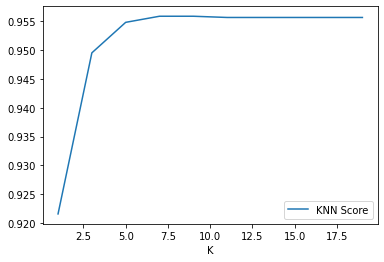

In [260]:
df_scores.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show();

In [263]:
# Entrenamos modelo
knn_model = KNeighborsClassifier(n_neighbors=7, weights="distance", metric="minkowski")
preds = cross_val_predict(knn_model, X, Y, cv=5, method="predict", n_jobs=3)
score = cross_val_score(knn_model, X, Y, cv=5, scoring="accuracy", n_jobs=3)
score

array([0.9565678 , 0.95550847, 0.95652174, 0.95652174, 0.95440085])

# Evaluación del modelo 

#### Calcular el Accuracy. 

#### Grafica la ROC-Curve.

#### Grafica la Confusion-Matrix.

#### Comenta los resultados. 